## 1. 선형 회귀(Linear Regression)

* 본 텀프로젝트의 목적은 **경사 하강법(Gradient Descent)를 이용하여 선형 회귀 문제를 해결**하는 것

* 사이킷런 [Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)을 참조하면 선형 회귀 모델에 대한 설명을 아래 사진과 같이 확인 가능

<center>
<img src="https://drive.google.com/uc?id=1KboYt4oBL1sZk3glRgQQPh9YjIBgLOso" width="900">
</center>


* 즉, 선형 회귀는 학습 데이터셋 $\{( x_i,y_i)|1\le i \le n\}$ (단, $ x_i=(x_{i1},\cdots,x_{ik})^{\rm T}$)에 대한 학습모델을 다음과 같이 각 특성값에 대해 선형이 되도록 가정하는 판별모델

$$\hat y = \beta_0 +\beta_1  x_1+\cdots +\beta_k  x_k$$

 * 편향(또는 절편) $\beta_0$와 가중치 $\beta_i\, (1\le i\le k)$를 합쳐서 모델 파라미터라고 정의

 * $k$차원 특성벡터 $ x=(x_1,\cdots,x_k)^{\rm T}$를 $ x=(1,x_1,\cdots,x_k)^{\rm T}$로 쓰고(즉, $x_0=1$), $\beta = (\beta_0,\beta_1,\cdots,\beta_k)^{\rm T}$로 나타내면 위 모델은 $\hat y = h_{\beta}(x)=\beta^{\rm T} x$로 간단히 표기 가능

 * 모든 훈련샘플의 특성 벡터를 $n\times (k+1)$행렬 $ X=(x_{ij})$로 나타낼 때, 
$$\hat {y} = (\hat y_1,\cdots,\hat y_n)^{\rm T} = X \beta$$

 * $k=1$일 때를 **단순선형회귀 모델**, $k>1$일 때를 **다중선형회귀 모델**이라 정의




(0.0, 2.0, 0.0, 15.0)

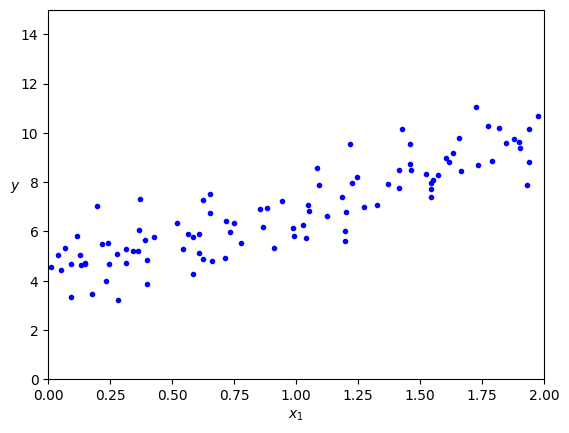

In [4]:
# 선형 회귀 문제를 풀기 위해
# 랜덤하게 데이터 샘플 생성 

import numpy as np # 행렬 연산을 위한 모듈
import matplotlib.pyplot as plt # 그래프 그리기 위한 모듈
#%matplotlib inline # 한줄에 그래프 출력

np.random.seed(42) # 랜덤 시드 고정

X = 2 * np.random.rand(100,1) # 0~1 사이의 난수 100개 생성
y = 4 + 3 * X + np.random.randn(100,1) # y = 4 + 3x + 가우시안 노이즈

plt.plot(X, y, 'b.') # 산점도 그리기
plt.xlabel("$x_1$", fontsize=10) # x축 이름 설정
plt.ylabel("$y$", rotation=0, fontsize=10) # y축 이름 설정
plt.axis([0, 2, 0, 15]) # 축 범위 고정

In [39]:
# 각 특성벡터의 첫 번째 좌표에 bias에 대응되는 1을 추가하여 Xb로 수정 
# 여러 가지 경사 하강법을 직접 구현해 볼 때 사용

Xb = np.column_stack((np.ones((100,1)), X)) # bias에 대응 할 수 있도록 1을 추가 # column_stack: 열로 쌓기

X_new = np.array([[0],[2]]) # 위에서 만든 데이터가 아닌 새로운 데이터 샘플 x_new를 정의하여 회귀 계수를 구할 때 마다 테스트에 사용
Xb_new = np.column_stack((np.ones((2,1)), X_new)) # bias에 대응 할 수 있도록 1을 추가

In [6]:
# sklearn의 LinearRegression을 활용하여 회귀 계수 구해보기
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # 선형 회귀 모델 생성
lin_reg.fit(X, y) # 선형 회귀 모델 학습
beta = np.array([lin_reg.intercept_, lin_reg.coef_],dtype=float) # 회귀 계수 받아오기 # intercept_: 절편, coef_: 기울기

y_predict = lin_reg.predict(X_new) # X_new에 대해서 y값을 선형 회귀 모델을 이용하여 예측

/var/folders/dv/dr6sg3sn6h16c2xkmjp_82bh0000gn/T/ipykernel_32837/4170513416.py:6: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  beta = np.array([lin_reg.intercept_, lin_reg.coef_],dtype=float) # 회귀 계수 받아오기 # intercept_: 절편, coef_: 기울기


Text(0.5, 1.0, 'Linear regression with Scikit Learn')

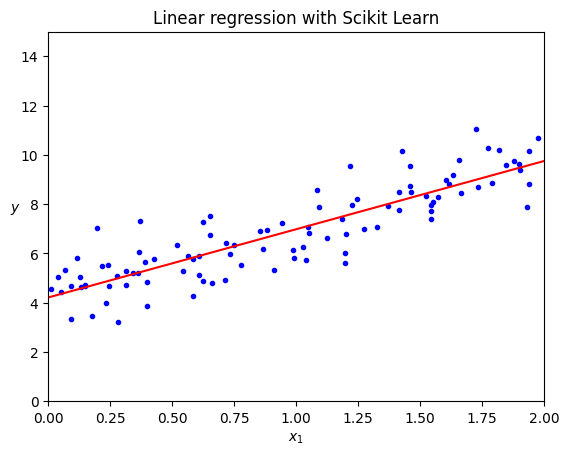

In [7]:
# 모델의 예측을 그래프에 나타내기 
plt.plot(X, y, 'b.') # 산점도 그리기
plt.plot(X_new, y_predict, 'r-') # 예측값 그리기
plt.xlabel("$x_1$", fontsize=10) 
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.axis([0, 2, 0, 15])
plt.title("Linear regression with Scikit Learn")

## 1-1. 회귀 계수 결정법 (Direct Solution)


* 선형회귀에서 주로 사용하는 Mean Squared Error(MSE) 손실 함수를 사용하면 아래로 볼록한(Convex) 형태의 손실함수를 가짐

$$
\begin{aligned}
&\\
L(\beta) & = \left\|\hat{y}-y \right\|_{2}^{2}\\
& = \left\|\beta X-y \right\|_{2}^{2}\\
& = (\beta X-y)^{\rm T}(\beta X-y)\\
& = \beta^{\rm T}X^{\rm T}X\beta-\beta^{\rm T}X^{\rm T}y-y^{\rm T}X\beta+y^{\rm T}y \\
\end{aligned}$$

\

* 아래로 볼록한(Convex) 형태의 손실함수의 최소값은 미분이 0이 되는 지점($\nabla_{\beta} L(\beta)=0$)을 통해 명시적인 해를 구할 수 있음


$$
\begin{aligned}
&\\
\nabla_{\beta} L(\beta)& =X^{\rm T}X\beta+X^{\rm T}X\beta-2X^{\rm T}y=0\\
& \Rightarrow  2X^{\rm T}X\beta=2X^{\rm T}y\\
& \Rightarrow  X^{\rm T}X\beta=X^{\rm T}y\\
\end{aligned}$$



$$\therefore \beta=(X^{\rm T}X)^{-1}X^{\rm T}y$$




In [16]:
####### Empty Module.1 #######
# Direct Solution을 통해서 최적의 Beta를 찾아보세요

beta_gradiant = np.linalg.inv(Xb.T@Xb) @ Xb.T @ y
y_predict_direct = beta_gradiant[1] * X_new + beta_gradiant[0] 
##############################

Text(0.5, 1.0, 'Linear regression with Direct Search(Least Square)')

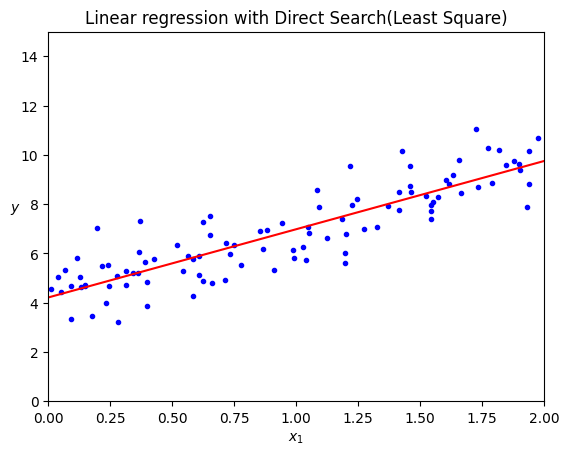

In [17]:
# 모델의 예측을 그래프에 나타내기 
plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict_direct, 'r-')
plt.xlabel("$x_1$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.axis([0, 2, 0, 15])
plt.title("Linear regression with Direct Search(Least Square)")

## 1-2. 회귀 계수 결정법 (Numerical Search)

* 경사하강법(gradient descent)와 같은 반복적인 방식으로 선형회귀 계수를 구할 수 있음

* 경사(gradient)란? **"임의의 지점에서 함수의 최대 증가 방향"**을 의미
$$ \text{경사(gradient)} ⇒ \nabla_{\beta}L(\beta)=[\frac{\partial L(\beta)}{\partial \beta_{0}},\cdots ,\frac{\partial L(\beta)}{\partial \beta_{k}}]\in R^{k+1}$$


* 결국 경사하강법은 최대 증가의 반대 방향인 최대 감소의 방향으로 회귀 계수를 업데이트 하겠다는 것
$$ \text{경사하강법(gradient descent)} ⇒ \beta^{(t+1)}=\beta^{(t)}-\eta \nabla_{\beta}L(\beta)$$


<center>
<img src="https://drive.google.com/uc?id=1PulS6p9zKdUsV9g0KPPP68ThA39gJirG" width="480">
</center>


#### 배치 경사 하강법(Batch Gradient Descent) : 구현 

* 파라미터를 업데이트 할 때마다 모든 학습 데이터를 사용하여 cost function의 gradient를 계산

* Vanilla Gradient Descent라 불림

* 모든 학습 데이터를 사용하기 때문에 gradient의 방향성은 정확하지만 연산이 오래걸려 학습 효율이 좋지 못함

$$\nabla_{\beta} L(\beta) = \dfrac 2 n  X^{\rm T}( X\beta- y) \; : \; \text{gradient}$$

$$\beta^{(t+1)}⇐\beta^{(t)}-\eta \nabla_{\beta}L(\beta) \; : \; \text{update rule}$$

In [44]:
beta_bgd_path = []
eta = 0.1 # 학습률 
n_epochs = 1000 # epoch 수 
n = 100 # 샘플수 

beta_bgd = np.random.randn(2,1)  # 무작위로 beta 초깃값 설정 

####### Empty Module.2 #######
# Batch Gradient Descent를 통해서 최적의 Beta를 찾아보세요
for iteration in range(n_epochs):
    grandiants = 2 / n * Xb.T.dot(Xb@beta_bgd- y)
    beta_bgd = beta_bgd - eta * grandiants
    beta_bgd_path.append(beta_bgd)
y_predict_bgd = X_new * beta_bgd[1] + beta_bgd[0]
##############################

In [45]:
beta_bgd # batch gradient descent로 구한 beta

array([[4.21509616],
       [2.77011339]])

In [46]:
y_predict_bgd # batch gradient descent로 구한 y_predict

array([[4.21509616],
       [9.75532293]])

Text(0.5, 1.0, 'Linear regression with BGD')

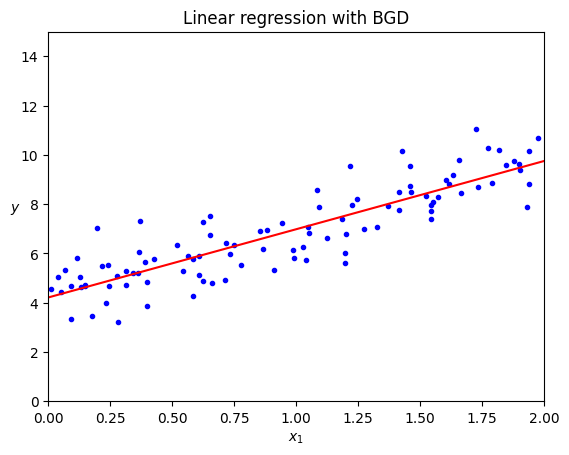

In [47]:
# 모델의 예측을 그래프에 나타내기 
plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict_bgd, 'r-')
plt.xlabel("$x_1$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.axis([0, 2, 0, 15])
plt.title(f"Linear regression with BGD")

#### 확률적 경사 하강법(Stochastic Gradient Descent) : 구현 

* 파라미터를 업데이트 할 때, 무작위로 샘플링된 학습 데이터를 하나씩만 이용하여 cost function의 gradient를 계산

* 모델을 자주 업데이트 하며, 성능 개선 정도를 빠르게 확인 가능

* Local minima에 빠질 가능성을 줄일 수 있음

$$\nabla_{\beta} L(\beta) = 2 x_{i}^{\rm T}(x_{i}\beta- y) \; : \; \text{gradient}$$

$$\beta^{(t+1)}⇐\beta^{(t)}-\eta \nabla_{\beta}L(\beta) \; : \; \text{update rule}$$

In [1]:
import numpy as np
np.random.permutation(100)

array([56,  7, 86, 44,  0, 89, 35, 65, 93, 67, 51, 49, 78,  9, 98, 13,  2,
       62, 28, 53, 43, 48, 74, 76, 61, 22, 41, 25, 14, 68, 42, 29, 66, 69,
       10, 27, 47,  5, 52, 16, 15, 87, 40, 91, 59, 21, 85, 88, 79, 37, 80,
       23, 45,  1, 20, 18, 31, 63, 60, 12, 46, 82, 17, 97,  4, 36, 64, 83,
       57, 71, 55, 32, 11, 73, 39, 92, 95, 38, 81, 33, 94,  3, 54, 24, 77,
       34, 99, 75, 96, 50, 19, 72, 30, 84, 58,  6, 70,  8, 90, 26])

In [53]:
beta_sgd_path = []
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터 
n = 100         # 샘플 수 

def learning_schedule(t): # 학습 스케줄 함수
    return t0 / (t + t1) # 시간이 갈수록 learning rate가 줄어들도록 설정
beta_sgd = np.random.randn(2,1)  # beta 무작위 초기화 

####### Empty Module.3 #########
# Stochastic Gradient Descent를 통해서 최적의 Beta를 찾아보세요
for epoch in range(n_epochs):
    for i in range(n):
        eta = learning_schedule(epoch * n + i)

        random_idx = np.random.randint(n)
        tx = random_idx
        ty = random_idx
        gradiants = 2 * Xb[tx:tx+1].T @ (Xb[tx:tx+1] @ beta_sgd - y[ty:ty+1])
        beta_sgd = beta_sgd - gradiants * eta
        beta_sgd_path.append(beta_sgd)

y_predict_sgd = X_new * beta_sgd[1] + beta_sgd[0] # 얻은 회귀 계수를 가지고 X_new에 대해서 y값을 예측하세요
##############################

In [54]:
beta_sgd # stochastic gradient descent로 구한 beta

array([[4.18599046],
       [2.73575419]])

In [55]:
y_predict_sgd # stochastic gradient descent로 구한 y_predict

array([[4.18599046],
       [9.65749884]])

Text(0.5, 1.0, 'Linear regression with SGD')

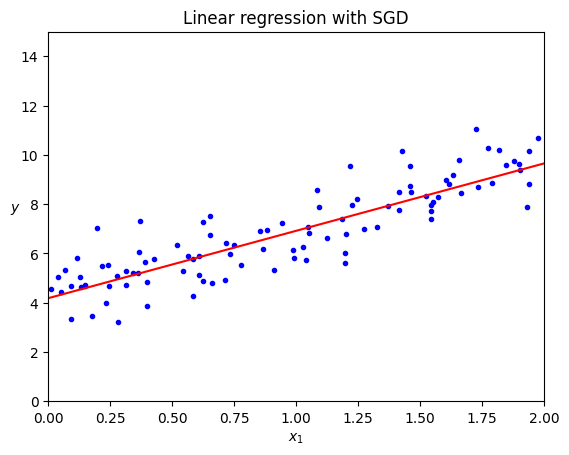

In [56]:
# 모델의 예측을 그래프에 나타내기 
plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict_sgd, 'r-')
plt.xlabel("$x_1$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.axis([0, 2, 0, 15])
plt.title(f"Linear regression with SGD")

#### 미니 배치 경사 하강법(Mini Batch Gradient Descent) : 구현 

* 파라미터를 업데이트 할 때마다 일정량의 일부 데이터를 무작위로 뽑아 cost function의 gradient를 계산

* Batch Gradient Descent와 Stochastic Gradient Descent 개념의 혼합

* SGD의 노이즈를 줄이면서, GD의 전체 배치보다 효율적

$$\nabla_{\beta}L(\beta)=\frac{2}{m}\sum_{i=1}^{m} x_{i}^{\rm T}(x_{i}^{\rm T}\beta-y) \; : \; \text{gradient}$$

$$\beta^{(t+1)}⇐\beta^{(t)}-\eta \nabla_{\beta}L(\beta) \; : \; \text{update rule}$$

In [34]:
beta_mgd_path = []

n_epochs = 50 # epoch 수
minibatch_size = 20 # batch size

np.random.seed(42) # 일정한 결과를 위해 랜덤 시드 고정
beta_mgd = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000 # 학습 스케줄 하이퍼파라미터
def learning_schedule(t):
    return t0 / (t + t1)

t = 0

####### Empty Module.4 #########
# Mini Batch Gradient Descent를 통해서 최적의 Beta를 찾아보세요.
for epoch in range(n_epochs):
    idx = np.random.permutation(n)
    
##############################

In [36]:
beta_mgd # mini-batch gradient descent로 구한 beta

array([[4.25214635],
       [2.7896408 ]])

In [37]:
y_predict_mgd # mini-batch gradient descent로 구한 y_predict

array([[4.25214635],
       [9.83142795]])

Text(0.5, 1.0, 'Linear regression with MGD')

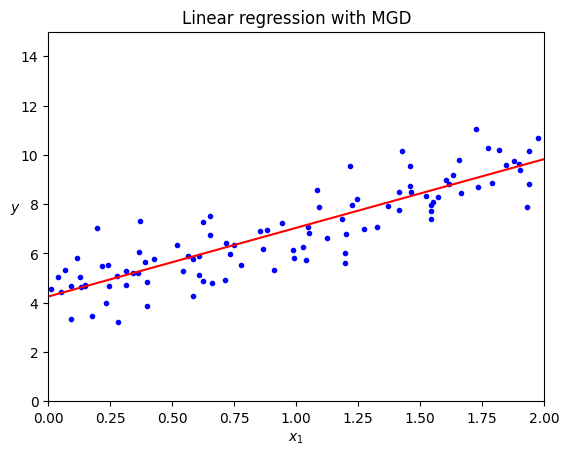

In [35]:
# 모델의 예측을 그래프에 나타내기 
plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict_mgd, 'r-')
plt.xlabel("$x_1$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.axis([0, 2, 0, 15])
plt.title(f"Linear regression with MGD")

#### 파라미터 공간에 표시된 경사 하강법의 경로 비교 

* 앞에서 계산해둔 `beta_bgd_path`, `beta_sgd_path`, `beta_mgd_path`에 각각 순차적으로 저장된 $(\beta_0,\beta_1)$값을 이용

(2.5, 4.25, 2.3, 3.9)

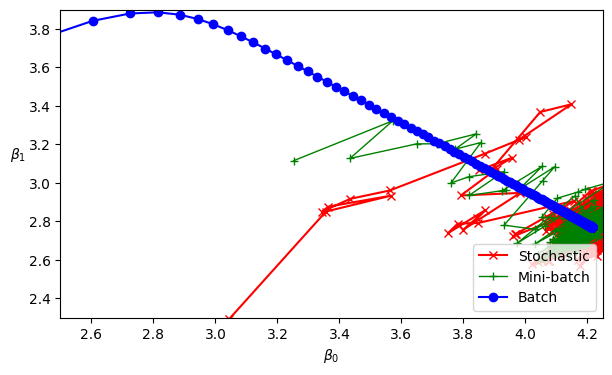

In [38]:
beta_bgd_path = np.array(beta_bgd_path) # batch gradient descent로 구한 beta
beta_sgd_path = np.array(beta_sgd_path) # stochastic gradient descent로 구한 beta
beta_mgd_path = np.array(beta_mgd_path) # mini-batch gradient descent로 구한 beta

plt.figure(figsize=(7,4)) # 그래프 사이즈 조절

# batch, stochastic, mini-batch gradient descent의 경로를 그래프에 나타내기
plt.plot(beta_sgd_path[:, 0], beta_sgd_path[:, 1], "r-x", linewidth=1.5, label="Stochastic")
plt.plot(beta_mgd_path[:, 0], beta_mgd_path[:, 1], "g-+", linewidth=1, label="Mini-batch")
plt.plot(beta_bgd_path[:, 0], beta_bgd_path[:, 1], "b-o", linewidth=1.5, label="Batch")

# 범례, x축, y축 이름, 그래프 범위 설정
plt.legend(loc="lower right", fontsize=10)
plt.xlabel(r"$\beta_0$", fontsize=10)
plt.ylabel(r"$\beta_1$   ", fontsize=10, rotation=0)
plt.axis([2.5, 4.25, 2.3, 3.9])

In [40]:
# 회귀 계수를 찾는 방법에 따라서 얻은 beta값들을 출력
print("{:36s} : {}, {}".format("사이킷런 회귀 계수",beta[0],beta[1]))
print("{:35s} : {}, {}".format("직접 구현한 회귀 계수(Direct Search)",beta_direct[0],beta_direct[1]))
print("{:35s} : {}, {}".format("직접 구현한 회귀 계수(Batch Descent)",beta_bgd[0],beta_bgd[1]))
print("{:35s} : {}, {}".format("직접 구현한 회귀 계수(Stochastic Descent)",beta_sgd[0],beta_sgd[1]))
print("{:35s} : {}, {}".format("직접 구현한 회귀 계수(Mini-Batch Descent)",beta_mgd[0],beta_mgd[1]))

직접 구현한 회귀 계수(Direct Search)         : [4.21509616], [2.77011339]
직접 구현한 회귀 계수(Batch Descent)         : [4.21509616], [2.77011339]
직접 구현한 회귀 계수(Stochastic Descent)    : [4.17887915], [2.72351388]
직접 구현한 회귀 계수(Mini-Batch Descent)    : [4.25214635], [2.7896408]



## 2. 선형 분류(Linear Classification)

* 본 텀프로젝트의 목적은 **경사 하강법(Gradient Descent)를 이용하여 선형 분류 문제를 해결**하는 것

* 사이킷런 [Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)을 참조하면 선형 분류 모델에 대한 설명을 아래 사진과 같이 확인 가능

<center>
<img src="https://drive.google.com/uc?id=1hfO_iU1tDg2pyFiyw2h5AeLi3Ro-p4-X" width="900">
</center>

* 레이블이 $1$, $0$인 두 개의 클래스에 대한 분류문제에서 샘플이 특정 클래스에 속할 확률을 추정하는 지도학습의 한 가지 (Binary case)



* 선형회귀 모델과 같이 입력 특성의 가중치의 합(편향 포함) ${\beta}^{\rm T} x = \beta_0+\beta_1 x_1+\cdots +\beta_nx_n$을 계산한 다음 시그모이드 함수(sigmoid) $\sigma(t)=\dfrac{1}{1+\exp(-t)}$를 취한 값 $\sigma({\beta}^{\rm T} x)$를 ${\rm P}(Y=1|X=x)$에 대한 추정값 $\hat p(x)$로 추정하는 모델.   


* 즉, 모델 파라미터 ${\beta}=(\beta_0,\cdots,\beta_n)^{\rm T}$에 대한 로지스틱 회귀 모델을 $h_{{\beta}}$라 할 때
$$ $$
$\quad \quad 
\hat p(x) = h_{{\beta}}(x)= \sigma({\beta}^{\rm T}x)
=\dfrac{1}{1+\exp(-{\beta}^{\rm T}x)}=\dfrac{1}{1+\exp\bigl(-(\beta_0+\beta_1x_1+\cdots+\beta_n x_n)\bigr)} 
$  <span style="color:blue">$\cdots\cdots$ (1)</span>


* <span style="color:blue"> 로지스틱 회귀 모델을 통한 레이블의 예측 :</span>    

* 샘플 $x$가 양성 클래스(y=1)에 속할 확률 $\hat p(x)=h_{{\beta}}(x)$를 추정한 후 다음과 같이 예측 $\hat y$를 구함 
$$ $$
$$
\hat y = \begin{cases} 0 & \text{ if }\hat p(x)<0.5\\ 1 &\text{ if }\hat p(x)\ge0.5
\end{cases}
$$


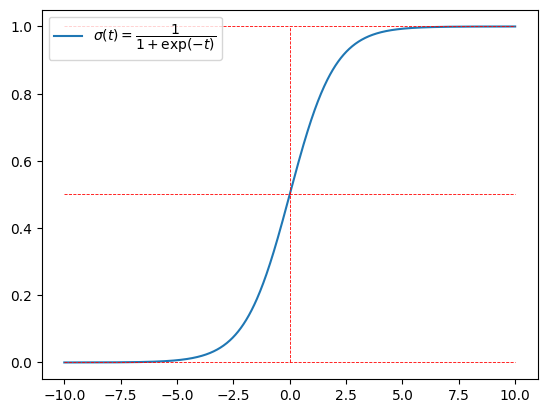

In [56]:
# 시그모이드 함수 시각화
def sigmoid(x):
    return 1/(1+np.exp(-x)) # 시그모이드 함수 정의

xlist = np.linspace(-10,10,1000) # -10 ~ 10 사이를 1000개의 구간으로 나누기
ylist = sigmoid(xlist) # 시그모이드 함수에 xlist를 넣어서 ylist를 구하기

# 시그모이드 함수 그래프 그리기
plt.plot(xlist,ylist, label=r"$\sigma (t)=\dfrac{1}{1+\exp(-t)}$") 

plt.plot([-10,10],[0.5,0.5], 'r--', linewidth=0.6) # y=0.5인 직선 그리기
plt.plot([-10,10],[1,1], 'r--', linewidth=0.6) # y=1인 직선 그리기
plt.plot([-10,10],[0,0], 'r--', linewidth=0.6) # y=0인 직선 그리기
plt.plot([0,0],[0,1],'r--', linewidth=0.6) # x=0인 직선 그리기

plt.legend(loc="upper left", fontsize=10)

**참고) 시그모이드 함수 미분** 
> $$
\begin{aligned}
&\\
\sigma (x)& =\frac{1}{1+e^{-x}} \\
\sigma' (x)& =\frac{0\cdot \left( 1+e^{-x}\right)  -1\cdot (e^{-x}\times -1)}{(1+e^{-x})^{2}}\\
& =  \frac{e^{-x}}{(1+e^{-x})^{2}} =\frac{1-1+e^{-x}}{(1+e^{-x})^{2}} =\frac{1+e^{-x}}{\left( 1+e^{-x}\right)^{2}  } -\frac{1}{\left( 1+e^{-x}\right)^{2}  }\\
& =  \frac{1}{1+e^{-x}} \left( 1-\frac{1}{1+e^{-x}} \right)  =\sigma (x)\left( 1-\sigma (x)\right)\\
\end{aligned}$$

## 2-1. 로지스틱 회귀모델의 손실 함수 

* 훈련 데이터셋 $\{(x_i,y_i)|1\le i \le n\}$이 주어질 때, 다음과 같이 정의되는 로지스틱 회귀의 비용함수 
$$ $$
$L(\beta) = -\dfrac 1 n \sum_{i=1}^n \left(y_i \ln p_i + (1-y_i)\ln (1-p_i)\right)\quad $ (단, $p_i= \sigma(\beta^{\rm T}x_i$) <span style="color:blue">
$$ $$
가 최소가 되는 모델 파라미터 $\beta$를 구하는 것   



Text(0, 0.5, 'sepal width')

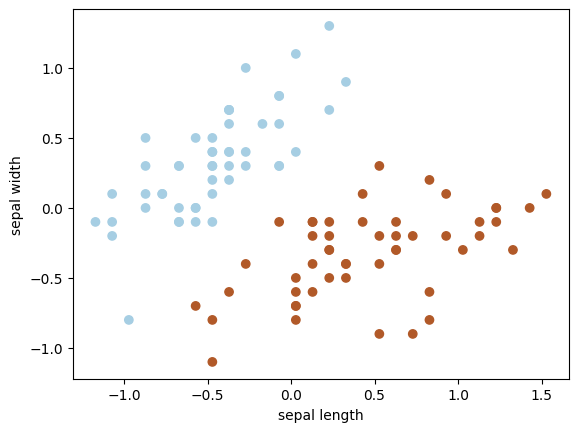

In [42]:
from sklearn.datasets import load_iris # iris 데이터셋 불러오기
iris = load_iris()

# 이진 분류를 위해 iris 데이터에서 두가지 클래스만을 사용

sepal_len = iris['data'][:100,0] # 꽃받침 길이
sepal_wid = iris['data'][:100,1] # 꽃받침 너비
labels = iris['target'][:100] # 클래스

sepal_len -= np.mean(sepal_len) # 꽃받침 길이의 평균을 0으로 만들기
sepal_wid -= np.mean(sepal_wid) # 꽃받침 너비의 평균을 0으로 만들기

# 꽃받침 길이와 너비를 x1, x2로 두고 산점도 그리기
plt.scatter(sepal_len, 
            sepal_wid,
            c=labels,
            cmap=plt.cm.Paired)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
# 4250 * 5 = 21250

In [43]:
# X, y 설정
X = np.stack([sepal_len, sepal_wid], axis=1) # 변수 X
y = labels # label y
y = np.expand_dims(y,axis=1)

In [44]:
def plot_sep(w1, w2, title, color='green'):

    # 그래프 그리기
    plt.scatter(sepal_len, 
                sepal_wid,
                c=labels,
                cmap=plt.cm.Paired)
    plt.title(title)
    plt.ylim([-1.5,1.5])
    plt.xlim([-1.5,2])
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")

    # 결정 경계 그리기
    if w2 != 0: # decision boundary is not vertical
        m = -w1/w2 # 기울기
        t = 1 if w2 > 0 else -1 # 절편
        plt.plot(
            [-1.5,2.0], 
            [-1.5*m, 2.0*m], 
            '-y', 
            color=color)
        plt.fill_between(
            [-1.5, 2.0],
            [m*-1.5, m*2.0],
            [t*1.5, t*1.5],
            alpha=0.2,
            color=color)
    if w2 == 0: # decision boundary is vertical
        t = 1 if w1 > 0 else -1
        plt.plot([0, 0],
                 [-1.5, 2.0],
                 '-y',
                color=color)
        plt.fill_between(
            [0, 2.0*t],
            [-1.5, -2.0],
            [1.5, 2],
            alpha=0.2,
            color=color) 

/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/dv/dr6sg3sn6h16c2xkmjp_82bh0000gn/T/ipykernel_53023/1243029879.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-y" (-> color='y'). The keyword argument will take precedence.
  plt.plot(


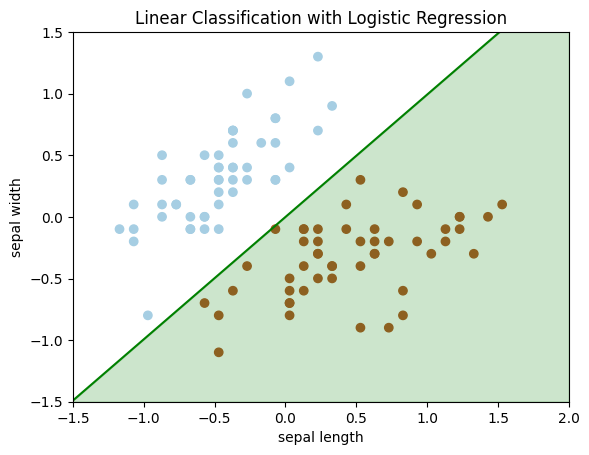

In [45]:
# sklearn의 LogisticRegression 활용하여 회귀 계수 구해보기
import sklearn.linear_model

# LogisticRegression 모델 생성
model = sklearn.linear_model.LogisticRegression(fit_intercept=False,random_state=42)
model.fit(X,y)
plot_sep(model.coef_[0][0], model.coef_[0][1], "Linear Classification with Logistic Regression") # 그래프 그리기


## 2-2. 회귀 계수 결정법 (Numerical Search)


* 비용함수 $L(\beta)$는 $\beta$에 대해 아래로 볼록한(Convex) 함수이므로 최솟값이 존재함을 보장할 수 있지만, Direct Search 처럼 해를 구하는 공식은 없음  

* 경사하강법 또는 다른 최적화 알고리즘(BFGS, Newton ...)을 이용하여 해의 근삿값을 구함 (`LogisticRegression`의 [solver](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)참고)





* 배치 경사하강법을 적용할 때 비용함수에 대한 그래디언트 벡터 $\nabla_{\beta}L(\beta)$ : 각 $i$ ($1\le i\le n)$에 대해 $\nabla_{\beta}L(\beta)$의 $j$번째 성분



$$
\begin{aligned}
&\\
\dfrac{\partial L(\beta)}{\partial \beta_j} & = -\frac{1}{n} \sum^{n}_{i=1} [y_{i}\cdot \left( \frac{1}{\sigma \left( \beta^{\rm T} x_{i}\right)  } \right)  \cdot \sigma \left( \beta^{\rm T} x_{i}\right)  \left( 1-\sigma \left( \beta^{\rm T} x_{i}\right)  \right)  \cdot x^{(n)}_{i}]-[\left( 1-y_{i}\right)  \cdot \left( \frac{1}{1-\sigma \left( \beta^{\rm T} x_{i}\right)  } \right)  \cdot \sigma \left( \beta^{\rm T} x_{i}\right)  \cdot \left( 1-\sigma \left( \beta^{\rm T} x_{i}\right)  \right)  \cdot x^{(n)}_{i}]\\
& = -\frac{1}{n} \sum^{n}_{i=1} [y_{i}\cdot \left( 1-\sigma \left( \beta^{\rm T} x_{i}\right)  \right)  \cdot x^{(n)}_{i}]+[\left( 1-y_{i}\right)  \cdot \left( -1\right)  \cdot \sigma \left( \beta^{\rm T} x_{i}\right)  \cdot x^{(n)}_{i}] \\
& = -\frac{1}{n} \sum^{n}_{i=1} \left[ y_{i}-y_{i}\cdot \sigma \left( \beta^{\rm T} x_{i}\right)  -\sigma \left( \beta^{\rm T} x_{i}\right)  +y_{i}\cdot \sigma \left( \beta^{T} x_{i}\right)  \right]  \cdot x^{(n)}_{i} \\
& = -\frac{1}{n} \sum^{n}_{i=1} \left[ y_{i}-\sigma \left( \beta^{\rm T} x_{i}\right)  \right]  \cdot x^{(n)}_{i} \\
& = \frac{1}{n} \sum^{n}_{i=1} \left[ \sigma \left( \beta^{\rm T} x_{i}\right)  -y_{i}\right]  \cdot x^{(n)}_{i} \\
\end{aligned}$$



#### 배치 경사 하강법(Batch Gradient Descent) : 구현 

* 파라미터를 업데이트 할 때마다 모든 학습 데이터를 사용하여 cost function의 gradient를 계산

* Vanilla Gradient Descent라 불림

* 모든 학습 데이터를 사용하기 때문에 gradient의 방향성은 정확하지만 연산이 오래걸려 학습 효율이 좋지 못함

$$\nabla_{\beta} L(\beta) = \dfrac 1 n  X^{\rm T}( \sigma (X\beta)- y) \; : \; \text{gradient}$$

$$\beta^{(t+1)}⇐\beta^{(t)}-\eta \nabla_{\beta}L(\beta) \; : \; \text{update rule}$$

In [57]:
beta_bgd_path = list()
eta = 0.1 # 학습률 
n_epochs = 500 # epoch 수 
n = 100 # 샘플수 

# seed 고정
np.random.seed(42)
beta_bgd = np.random.randn(2,1) 

####### Empty Module.5 #########
# Batch Gradient Descent를 통해서 최적의 Beta를 찾아보세요
for iteration in range(n_epochs):
    
    gradients = 1/n * X.T.dot(sigmoid(X.dot(beta_bgd)) - y) # 배치 경사 하강법에 해당하는 gradient를 계산하세요
    beta_bgd = beta_bgd - eta * gradients # update rule에 따라서 beta_bgd를 update 하세요 
    beta_bgd_path.append(beta_bgd)         
###############################

In [59]:
gradients, beta_bgd # gradient와 beta_bgd 출력

(array([[-0.02415913],
        [ 0.02961619]]),
 array([[ 3.32414872],
        [-3.12681253]]))

/var/folders/dv/dr6sg3sn6h16c2xkmjp_82bh0000gn/T/ipykernel_53023/1243029879.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-y" (-> color='y'). The keyword argument will take precedence.
  plt.plot(


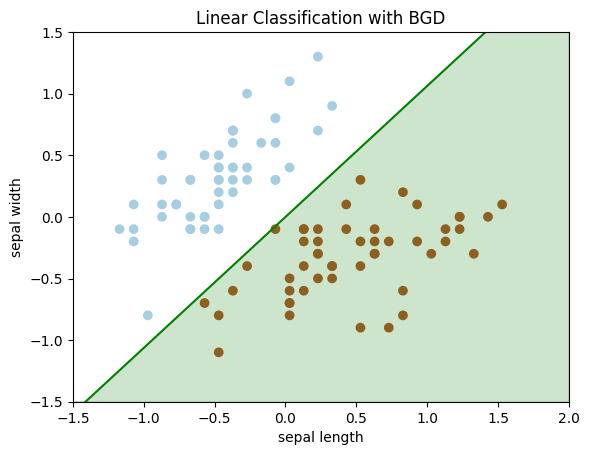

In [60]:
# 결정 경계 시각화
plot_sep(beta_bgd[0][0], beta_bgd[1][0], "Linear Classification with BGD")

#### 확률적 경사 하강법(Stochastic Gradient Descent) : 구현 

* 파라미터를 업데이트 할 때, 무작위로 샘플링된 학습 데이터를 하나씩만 이용하여 cost function의 gradient를 계산

* 모델을 자주 업데이트 하며, 성능 개선 정도를 빠르게 확인 가능

* Local minima에 빠질 가능성을 줄일 수 있음

$$\nabla_{\beta} L(\beta) = x(\sigma(x^{\rm T}\beta)- y) \; : \; \text{gradient}$$

$$\beta^{(t+1)}⇐\beta^{(t)}-\eta \nabla_{\beta}L(\beta) \; : \; \text{update rule}$$

In [103]:
beta_sgd_path = []
n_epochs = 500
t0, t1 = 5, 10  # 학습 스케줄 하이퍼파라미터 
n = 100         # 샘플 수 

def learning_schedule(t):
    return t0/(t+t1)
    
np.random.seed(42)
beta_sgd = np.random.randn(2,1)  # beta 무작위 초기화 

####### Empty Module.6 #########
# Stochastic Gradient Descent를 통해서 최적의 Beta를 찾아보세요
for epoch in range(n_epochs):
    for i in range(n):
        eta = learning_schedule(epoch * n + i)

        random_idx = np.random.randint(n) # 0 ~ n-1 까지 랜덤하게 인덱스 선택
        tx = random_idx # random_idx를 활용해 샘플 하나 선택
        ty = random_idx # random_idx를 활용해 샘플 하나 선택
        # 확률적 경사 하강법에 해당하는 gradient를 계산하세요 
        #print(X[tx].shape, beta_sgd.shape, y[ty].shape)
        gradients = X[tx].reshape(2, 1).dot((sigmoid(X[tx].T.dot(beta_sgd)) - y[ty]).reshape(1, 1)) # 배치 경사 하강법에 해당하는 gradient를 계산하세요
        # (2, 1) * (1, 1) = (2, 1)
        beta_sgd = beta_sgd - eta * gradients # update rule에 따라서 beta_mgd를 update 하세요

        beta_sgd_path.append(beta_sgd)
##############################

/var/folders/dv/dr6sg3sn6h16c2xkmjp_82bh0000gn/T/ipykernel_53023/1243029879.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-y" (-> color='y'). The keyword argument will take precedence.
  plt.plot(


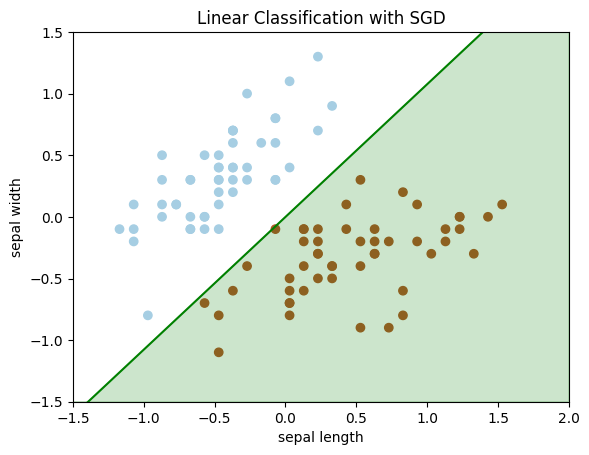

In [104]:
# 결정 경계 시각화
plot_sep(beta_sgd[0][0], beta_sgd[1][0], "Linear Classification with SGD")

#### 미니 배치 경사 하강법(Mini Batch Gradient Descent) : 구현 

* 파라미터를 업데이트 할 때마다 일정량의 일부 데이터를 무작위로 뽑아 cost function의 gradient를 계산

* Batch Gradient Descent와 Stochastic Gradient Descent 개념의 혼합

* SGD의 노이즈를 줄이면서, GD의 전체 배치보다 효율적

$$\nabla_{\beta}L(\beta)=\frac{1}{m}\sum_{i=1}^{m} x_{i}(\sigma (x_{i}^{\rm T}\beta)-y) \; : \; \text{gradient}$$

$$\beta^{(t+1)}⇐\beta^{(t)}-\eta \nabla_{\beta}L(\beta) \; : \; \text{update rule}$$

In [117]:
beta_mgd_path = []

n_epochs = 50
minibatch_size = 20

# seed 고정
np.random.seed(42)
beta_mgd = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000 # 학습 스케줄 하이퍼파라미터
def learning_schedule(t):
    return t0 / (t + t1)

t = 0

####### Empty Module.8#########
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(n) # 0 ~ n-1 까지 랜덤하게 인덱스를 섞어주세요
    X_shuffled = X[shuffled_indices] # X 랜덤 인덱싱
    y_shuffled = y[shuffled_indices] # y 랜덤 인덱싱
    for i in range(0, n, minibatch_size): # 0 ~ n-1 까지 minibatch_size 단위로 샘플링
        t += 1
        eta = learning_schedule(t)

        tx = X_shuffled[i:i+minibatch_size] # minibatch_size를 활용해 batch 단위로 샘플링
        ty = y_shuffled[i:i+minibatch_size] # minibatch_size를 활용해 batch 단위로 샘플링
        gradients = 1 / minibatch_size * tx.T.dot(sigmoid(tx.dot(beta_mgd)) - ty) # 미니 배치 경사 하강법에 해당하는 gradient를 계산하세요
        beta_mgd = beta_mgd - eta * gradients # update rule에 따라서 beta_mgd를 update 하세요                                                            
        beta_mgd_path.append(beta_mgd)
############################### 

/var/folders/dv/dr6sg3sn6h16c2xkmjp_82bh0000gn/T/ipykernel_53023/1243029879.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-y" (-> color='y'). The keyword argument will take precedence.
  plt.plot(


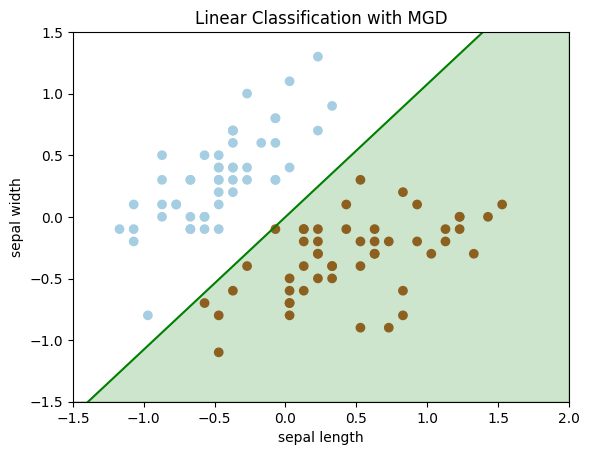

In [118]:
# 결정 경계 시각화
plot_sep(beta_mgd[0][0], beta_mgd[1][0], "Linear Classification with MGD")

#### 파라미터 공간에 표시된 경사 하강법의 경로 비교 

* 앞에서 계산해둔 `beta_bgd_path`, `beta_sgd_path`, `beta_mgd_path`에 각각 순차적으로 저장된 $(\beta_0,\beta_1)$값을 이용

Text(0, 0.5, '$\\beta_1$   ')

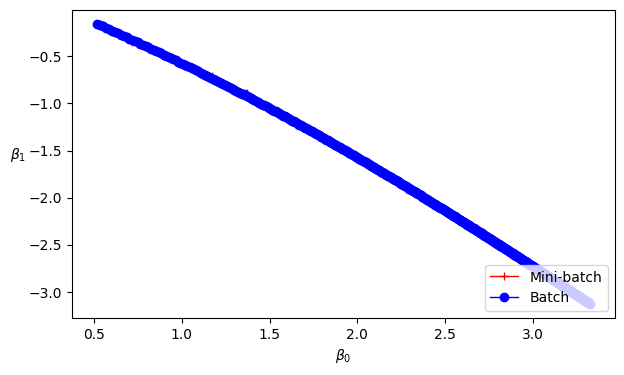

In [ ]:
# 경사 하강법 경로 시각화
beta_bgd_path = np.array(beta_bgd_path)
beta_sgd_path = np.array(beta_sgd_path)
beta_mgd_path = np.array(beta_mgd_path)

# 그래프 그리기
plt.figure(figsize=(7,4))
plt.plot(beta_sgd_path[:, 0], beta_sgd_path[:, 1], "r-x", linewidth=0.5, label="Stochastic")
plt.plot(beta_mgd_path[:, 0], beta_mgd_path[:, 1], "g-+", linewidth=1, label="Mini-batch")
plt.plot(beta_bgd_path[:, 0], beta_bgd_path[:, 1], "b-o", linewidth=1., label="Batch")
plt.legend(loc="lower right", fontsize=10)
plt.xlabel(r"$\beta_0$", fontsize=10)
plt.ylabel(r"$\beta_1$   ", fontsize=10, rotation=0)

In [123]:
# 경사 하강법 회귀 계수 비교
print("{:36s} : {}, {}".format("사이킷런 회귀 계수",model.coef_[0][0], model.coef_[0][1]))
print("{:35s} : {}, {}".format("직접 구현한 회귀 계수(Batch Descent)",beta_bgd[0][0], beta_bgd[1][0]))
print("{:35s} : {}, {}".format("직접 구현한 회귀 계수(Stochastic Descent)",beta_sgd[0][0], beta_sgd[1][0]))
print("{:35s} : {}, {}".format("직접 구현한 회귀 계수(Mini-Batch Descent)",beta_mgd[0][0], beta_mgd[1][0]))

사이킷런 회귀 계수                           : 3.022364354658903, -3.0422931618782303
직접 구현한 회귀 계수(Batch Descent)         : 3.324148723339024, -3.126812525328789
직접 구현한 회귀 계수(Stochastic Descent)    : 3.134597274523628, -2.9095723607050457
직접 구현한 회귀 계수(Mini-Batch Descent)    : 3.1901338535067225, -2.9623804407423164


# 보고서

1. 사이킷런에 구현되어 있는 [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)은 이번 텀프로젝트에서 구현한 경사 하강법(Gradient Descent) 기반의 방식과 어떤 차이가 있는지 자유롭게 서술하세요. [1점]

    * 회귀 계수를 추정하는 과정에서의 다른 부분을 위주로 서술하시면 됩니다.

2. 사이킷런에 구현되어 있는 [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)은 이번 텀프로젝트에서 구현한 경사 하강법(Gradient Descent) 기반의 방식과 어떤 차이가 있는지 자유롭게 서술하세요. [1점]

    * 회귀 계수를 추정하는 과정에서의 다른 부분을 위주로 서술하시면 됩니다.